In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

In [3]:
df = pd.read_csv("dataset/Arrhythmia.csv")
df['class'].describe()

count    452.000000
mean       3.880531
std        4.407097
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       16.000000
Name: class, dtype: float64

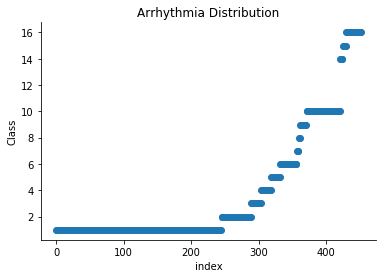

In [4]:
plt.scatter(range(df.shape[0]), np.sort(df['class'].values))
plt.xlabel('index')
plt.ylabel('Class')
plt.title("Arrhythmia Distribution")
sns.despine()

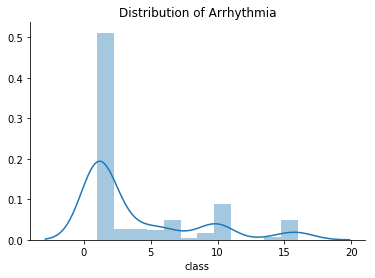

In [5]:
sns.distplot(df['class'])
plt.title("Distribution of Arrhythmia")
sns.despine()

In [6]:
print("Skewness: %f" % df['class'].skew())
print("Kurtosis: %f" % df['class'].kurt())

Skewness: 1.487672
Kurtosis: 1.078766


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


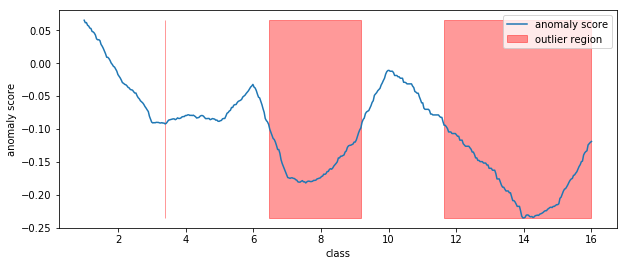

In [7]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['class'].values.reshape(-1, 1))
xx = np.linspace(df['class'].min(), df['class'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('class')
plt.show();

In [8]:
df.iloc[8]

age                            44.0
sex                             0.0
height                        168.0
weight                         56.0
QRSduration                    84.0
PRinterval                    118.0
Q-Tinterval                   354.0
Tinterval                     160.0
Pinterval                      63.0
QRS                            61.0
T                              69.0
P                              78.0
QRST                           66.0
J                              84.0
heartrate                      64.0
chDI_Qwave                      0.0
chDI_Rwave                     40.0
chDI_Swave                      0.0
chDI_RPwave                     0.0
chDI_SPwave                     0.0
chDI_intrinsicReflecttions     20.0
chDI_RRwaveExists               0.0
chDI_DD_RRwaveExists            0.0
chDI_RPwaveExists               0.0
chDI_DD_RPwaveExists            0.0
chDI_RTwaveExists               0.0
chDI_DD_RTwaveExists            0.0
chDII_Qwave                 